In [1]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt 

In [2]:
#get data
def GetData(fileName):
    return read_csv(fileName, header=0, parse_dates=[0], index_col=0).values

In [3]:
#Get exchange rates
ActualData = GetData('stock_data.csv')
#Size of exchange rates
NumberOfElements = len(ActualData)

In [4]:
from pyramid.arima import auto_arima

In [5]:
#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
	model = ARIMA(Actual, order=(P, D, Q))
	model_fit = model.fit(disp=True,maxiter=50)
	prediction = model_fit.forecast()[0]
	return prediction

In [6]:
stepwise_model = auto_arima(ActualData, start_p=1, start_q=1,
                           max_p=8, max_q=8, m=12,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True) 
stepwise_model.aic()

Fit ARIMA: order=(1, 1, 1); AIC=9764.815, BIC=9788.137, Fit time=0.472 seconds
Fit ARIMA: order=(0, 1, 0); AIC=9782.633, BIC=9794.294, Fit time=0.005 seconds
Fit ARIMA: order=(1, 1, 0); AIC=9763.630, BIC=9781.122, Fit time=0.049 seconds
Fit ARIMA: order=(0, 1, 1); AIC=9764.571, BIC=9782.063, Fit time=0.043 seconds
Fit ARIMA: order=(2, 1, 0); AIC=9764.633, BIC=9787.955, Fit time=0.075 seconds
Fit ARIMA: order=(2, 1, 1); AIC=9766.633, BIC=9795.785, Fit time=0.601 seconds
Total fit time: 1.249 seconds


9763.630249336313

In [7]:
#Use 70% of data as training, rest 30% to Test model
TrainingSize = int(NumberOfElements * 0.7)
TrainingData = ActualData[0:TrainingSize]
TestData = ActualData[TrainingSize:NumberOfElements]

#new arrays to store actual and predictions
Actual = [x for x in TrainingData]
Predictions = list()
Diff = []

#in a for loop, predict values using ARIMA model
for timepoint in range(len(TestData)):
    ActualValue =  TestData[timepoint]
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 1,1,0) 
    Diff = (Prediction-ActualValue)
    print('Actual = %f, Predicted = %f, Diff = %f, ' % (ActualValue, Prediction, Diff))
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)

Actual = 88.850000, Predicted = 89.359309, Diff = 0.509309, 
Actual = 89.160000, Predicted = 88.964132, Diff = -0.195868, 
Actual = 89.310000, Predicted = 89.155937, Diff = -0.154063, 
Actual = 88.580000, Predicted = 89.334709, Diff = 0.754709, 
Actual = 85.980000, Predicted = 88.762048, Diff = 2.782048, 
Actual = 88.270000, Predicted = 86.493664, Diff = -1.776336, 
Actual = 90.330000, Predicted = 87.907974, Diff = -2.422026, 
Actual = 89.960000, Predicted = 90.014764, Diff = 0.054764, 
Actual = 90.420000, Predicted = 90.077855, Diff = -0.342145, 
Actual = 90.420000, Predicted = 90.390061, Diff = -0.029939, 
Actual = 91.590000, Predicted = 90.472107, Diff = -1.117893, 
Actual = 92.880000, Predicted = 91.434084, Diff = -1.445916, 
Actual = 94.270000, Predicted = 92.704231, Diff = -1.565769, 
Actual = 95.230000, Predicted = 94.078285, Diff = -1.151715, 
Actual = 95.000000, Predicted = 95.115574, Diff = 0.115574, 
Actual = 95.150000, Predicted = 95.095541, Diff = -0.054459, 
Actual = 94.6

Actual = 103.990000, Predicted = 104.137153, Diff = 0.147153, 
Actual = 102.890000, Predicted = 103.948667, Diff = 1.058667, 
Actual = 103.020000, Predicted = 103.135890, Diff = 0.115890, 
Actual = 106.020000, Predicted = 103.053803, Diff = -2.966197, 
Actual = 105.930000, Predicted = 105.560998, Diff = -0.369002, 
Actual = 106.320000, Predicted = 106.003415, Diff = -0.316585, 
Actual = 108.090000, Predicted = 106.311067, Diff = -1.778933, 
Actual = 107.520000, Predicted = 107.845114, Diff = 0.325114, 
Actual = 107.290000, Predicted = 107.676857, Diff = 0.386857, 
Actual = 107.580000, Predicted = 107.388187, Diff = -0.191813, 
Actual = 106.960000, Predicted = 107.588940, Diff = 0.628940, 
Actual = 107.750000, Predicted = 107.125010, Diff = -0.624990, 
Actual = 106.560000, Predicted = 107.672881, Diff = 1.112881, 
Actual = 105.400000, Predicted = 106.823238, Diff = 1.423238, 
Actual = 106.200000, Predicted = 105.656616, Diff = -0.543384, 
Actual = 105.720000, Predicted = 106.120186, Dif

Actual = 149.940000, Predicted = 149.089349, Diff = -0.850651, 
Actual = 150.820000, Predicted = 149.922956, Diff = -0.897044, 
Actual = 149.790000, Predicted = 150.758694, Diff = 0.968694, 
Actual = 149.680000, Predicted = 150.033983, Diff = 0.353983, 
Actual = 149.940000, Predicted = 149.776409, Diff = -0.163591, 
Actual = 149.380000, Predicted = 149.977262, Diff = 0.597262, 
Actual = 149.920000, Predicted = 149.548256, Diff = -0.371744, 
Actual = 149.140000, Predicted = 149.912277, Diff = 0.772277, 
Actual = 149.540000, Predicted = 149.343443, Diff = -0.196557, 
Actual = 150.280000, Predicted = 149.554364, Diff = -0.725636, 
Actual = 149.850000, Predicted = 150.240252, Diff = 0.390252, 
Actual = 150.940000, Predicted = 149.997628, Diff = -0.942372, 
Actual = 151.160000, Predicted = 150.844191, Diff = -0.315809, 
Actual = 151.100000, Predicted = 151.204004, Diff = 0.104004, 
Actual = 141.900000, Predicted = 151.188868, Diff = 9.288868, 
Actual = 143.280000, Predicted = 143.447003, Di

Actual = 170.990000, Predicted = 171.812544, Diff = 0.822544, 
Actual = 169.350000, Predicted = 171.183050, Diff = 1.833050, 
Actual = 167.190000, Predicted = 169.676538, Diff = 2.486538, 
Actual = 166.720000, Predicted = 167.589777, Diff = 0.869777, 
Actual = 169.200000, Predicted = 166.870948, Diff = -2.329052, 
Actual = 165.850000, Predicted = 168.919598, Diff = 3.069598, 
Actual = 164.320000, Predicted = 166.429908, Diff = 2.109908, 
Actual = 165.820000, Predicted = 164.625345, Diff = -1.194655, 
Actual = 167.250000, Predicted = 165.680668, Diff = -1.569332, 
Actual = 165.990000, Predicted = 167.122511, Diff = 1.132511, 
Actual = 168.880000, Predicted = 166.256920, Diff = -2.623080, 
Actual = 169.220000, Predicted = 168.535369, Diff = -0.684631, 
Actual = 169.120000, Predicted = 169.253100, Diff = 0.133100, 
Actual = 170.330000, Predicted = 169.217913, Diff = -1.112087, 
Actual = 171.560000, Predicted = 170.235211, Diff = -1.324789, 
Actual = 171.700000, Predicted = 171.463335, Dif

Actual = 191.970000, Predicted = 191.485575, Diff = -0.484425, 
Actual = 189.030000, Predicted = 192.000297, Diff = 2.970297, 
Actual = 189.210000, Predicted = 189.446836, Diff = 0.236836, 
Actual = 189.250000, Predicted = 189.275899, Diff = 0.025899, 
Actual = 190.260000, Predicted = 189.331609, Diff = -0.928391, 
Actual = 189.400000, Predicted = 190.233079, Diff = 0.833079, 
Actual = 187.900000, Predicted = 189.582884, Diff = 1.682884, 
Actual = 185.780000, Predicted = 188.153592, Diff = 2.373592, 
Actual = 183.070000, Predicted = 186.100295, Diff = 3.030295, 
Actual = 184.260000, Predicted = 183.450636, Diff = -0.809364, 
Actual = 185.150000, Predicted = 184.211921, Diff = -0.938079, 
Actual = 184.040000, Predicted = 185.135624, Diff = 1.095624, 
Actual = 181.350000, Predicted = 184.245654, Diff = 2.895654, 
Actual = 180.940000, Predicted = 181.726667, Diff = 0.786667, 
Actual = 183.160000, Predicted = 181.066232, Diff = -2.093768, 


/Users/mac/anaconda3/envs/AI-Test/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Actual = 182.040000, Predicted = 182.999684, Diff = 0.959684, 
Actual = 184.200000, Predicted = 182.244992, Diff = -1.955008, 
Actual = 181.760000, Predicted = 184.044702, Diff = 2.284702, 
Actual = 185.690000, Predicted = 182.113607, Diff = -3.576393, 
Actual = 183.180000, Predicted = 185.328649, Diff = 2.148649, 
Actual = 183.340000, Predicted = 183.551601, Diff = 0.211601, 
Actual = 187.380000, Predicted = 183.404417, Diff = -3.975583, 
Actual = 188.570000, Predicted = 187.000609, Diff = -1.569391, 
Actual = 186.390000, Predicted = 188.520031, Diff = 2.130031, 
Actual = 187.410000, Predicted = 186.722754, Diff = -0.687246, 
Actual = 188.940000, Predicted = 187.377913, Diff = -1.562087, 
Actual = 189.370000, Predicted = 188.850733, Diff = -0.519267, 
Actual = 187.620000, Predicted = 189.406441, Diff = 1.786441, 
Actual = 189.630000, Predicted = 187.904137, Diff = -1.725863, 
Actual = 187.570000, Predicted = 189.484954, Diff = 1.914954, 
Actual = 189.630000, Predicted = 187.892508, Di

Actual = 143.910000, Predicted = 144.522775, Diff = 0.612775, 
Actual = 148.060000, Predicted = 143.915807, Diff = -4.144193, 
Actual = 148.920000, Predicted = 147.709084, Diff = -1.210916, 
Actual = 150.640000, Predicted = 148.896967, Diff = -1.743033, 
Actual = 151.850000, Predicted = 150.533247, Diff = -1.316753, 
Actual = 152.230000, Predicted = 151.794338, Diff = -0.435662, 
Actual = 150.210000, Predicted = 152.255923, Diff = 2.045923, 
Actual = 149.630000, Predicted = 150.470430, Diff = 0.840430, 
Actual = 152.430000, Predicted = 149.748692, Diff = -2.681308, 
Actual = 153.540000, Predicted = 152.218483, Diff = -1.321517, 
Actual = 156.830000, Predicted = 153.495329, Diff = -3.334671, 
Actual = 155.740000, Predicted = 156.575775, Diff = 0.835775, 
Actual = 153.490000, Predicted = 155.910777, Diff = 2.420777, 
Actual = 153.450000, Predicted = 153.771822, Diff = 0.321822, 
Actual = 154.820000, Predicted = 153.517324, Diff = -1.302676, 
Actual = 155.120000, Predicted = 154.751228, D

In [8]:
#Diff.head()

In [9]:
#pyplot.figure(1, figsize=(19, 10))
#pyplot.plot(Diff)
#pyplot.show()

Test RMSE: 2.432
Test Mean Squared Error (smaller the better fit): 5.913
R^2 score (biger the better fit): 0.996


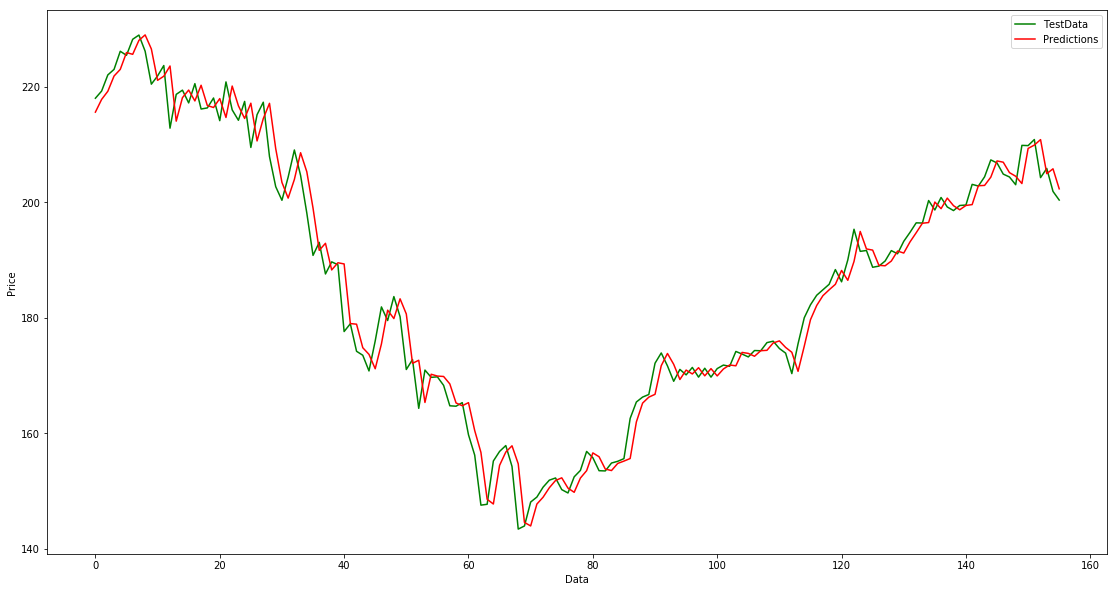

In [10]:
#Print error to see how good the model is
Error = mean_squared_error(TestData, Predictions)
rmse = sqrt(mean_squared_error(TestData, Predictions))
return_r_score = r2_score(TestData, Predictions)
print('Test RMSE: %.3f' % rmse)
print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)
print('R^2 score (biger the better fit): %.3f' % return_r_score)

pyplot.figure(1, figsize=(19, 10))
pyplot.plot(TestData[600:], color='green')
pyplot.plot(Predictions[600:], color='red')
pyplot.xlabel('Data')
pyplot.ylabel('Price')
pyplot.legend(['TestData','Predictions'])
pyplot.show()